In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.keras.preprocessing.image import load_img

In [4]:
path = './data/train/straight'
img = '0f9d3172f6ec3206d6f76318830159b2.jpg'
full_name = f'{path}/{img}'

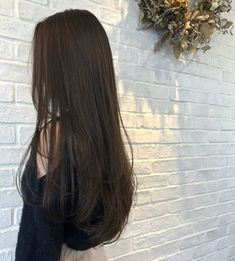

In [5]:
load_img(full_name)

In [6]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [7]:
inputs = keras.Input(shape=(200, 200, 3))
conv = keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
pool = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv)
flat = keras.layers.Flatten()(pool)
dense = keras.layers.Dense(64, activation="relu")(flat)
outputs = keras.layers.Dense(1)(dense)

In [8]:
model = keras.Model(inputs, outputs)

In [9]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 313632)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      20,072,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,073,473 (76.57 MB)

 Trainable params: 20,073,473 (76.57 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
optimizer = keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)
loss = keras.losses.BinaryCrossentropy()

In [11]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
train_gen = ImageDataGenerator(rescale=1./255)

train_ds = train_gen.flow_from_directory(
    './data/train',
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

Found 800 images belonging to 2 classes.


In [14]:
test_gen = ImageDataGenerator(rescale=1./255)

test_ds = test_gen.flow_from_directory(
    './data/test',
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

Found 201 images belonging to 2 classes.


In [16]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 227ms/step - accuracy: 0.4879 - loss: 8.1647 - val_accuracy: 0.4876 - val_loss: 8.1695
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 209ms/step - accuracy: 0.4783 - loss: 8.3176 - val_accuracy: 0.4876 - val_loss: 8.1695
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 236ms/step - accuracy: 0.4713 - loss: 8.4283 - val_accuracy: 0.4876 - val_loss: 8.1695
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 226ms/step - accuracy: 0.5038 - loss: 7.9098 - val_accuracy: 0.4876 - val_loss: 8.1695
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 226ms/step - accuracy: 0.5203 - loss: 7.6480 - val_accuracy: 0.4876 - val_loss: 8.1695
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 240ms/step - accuracy: 0.4603 - loss: 8.6033 - val_accuracy: 0.4876 - val_loss: 8.1695
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 214ms/step - accuracy: 0.4783 - loss: 8.3171 - val_accuracy: 0.4876 - val_loss: 8.1695
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 223ms/step - accuracy: 0.4797 - loss: 8.2941 - val_accuracy: 0

In [17]:
history.history

{'accuracy': [0.48750001192092896,
  0.48750001192092896,
  0.48750001192092896,
  0.48750001192092896,
  0.48750001192092896,
  0.48750001192092896,
  0.48750001192092896,
  0.48750001192092896,
  0.48750001192092896,
  0.48750001192092896],
 'loss': [8.170472145080566,
  8.170472145080566,
  8.170472145080566,
  8.170472145080566,
  8.170472145080566,
  8.170472145080566,
  8.170472145080566,
  8.170472145080566,
  8.170472145080566,
  8.170472145080566],
 'val_accuracy': [0.4875621795654297,
  0.4875621795654297,
  0.4875621795654297,
  0.4875621795654297,
  0.4875621795654297,
  0.4875621795654297,
  0.4875621795654297,
  0.4875621795654297,
  0.4875621795654297,
  0.4875621795654297],
 'val_loss': [8.169480323791504,
  8.169480323791504,
  8.169480323791504,
  8.169480323791504,
  8.169480323791504,
  8.169480323791504,
  8.169480323791504,
  8.169480323791504,
  8.169480323791504,
  8.169480323791504]}

In [18]:
np.median(history.history['accuracy'])

0.48750001192092896

In [21]:
np.std(history.history['loss'])

0.0

In [22]:
train_gen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [24]:
train_data = train_gen_aug.flow_from_directory(
    './data/train',
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

Found 800 images belonging to 2 classes.


In [25]:
test_gen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [26]:
test_data = test_gen_aug.flow_from_directory(
    './data/test',
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

Found 201 images belonging to 2 classes.


In [31]:
history_aug = model.fit(train_data, epochs=10, validation_data=test_data)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - accuracy: 0.4672 - loss: 8.4946

E:\My_projects\ML\Zoomcamp\task\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 465ms/step - accuracy: 0.4677 - loss: 8.4867 - val_accuracy: 0.4876 - val_loss: 8.1695
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 458ms/step - accuracy: 0.5044 - loss: 7.9006 - val_accuracy: 0.4876 - val_loss: 8.1695
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 448ms/step - accuracy: 0.4838 - loss: 8.2295 - val_accuracy: 0.4876 - val_loss: 8.1695
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 459ms/step - accuracy: 0.4834 - loss: 8.2362 - val_accuracy: 0.4876 - val_loss: 8.1695
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 470ms/step - accuracy: 0.5053 - loss: 7.8872 - val_accuracy: 0.4876 - val_loss: 8.1695
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 471ms/step - accuracy: 0.4746 - loss: 8.3764 - val_accuracy: 0.4876 - val_loss: 8.1695
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 496ms/step - accuracy: 0.4587 - loss: 8.6303 - val_accuracy: 0.4876 - val_loss: 8.1695
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 540ms/step - accuracy: 0.4745 - loss: 8.3772 - val_accuracy: 0.487

In [30]:
!pip install scipy

  Using cached scipy-1.14.1-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.14.1-cp311-cp311-win_amd64.whl (44.8 MB)


In [32]:
history_aug.history

{'accuracy': [0.48750001192092896,
  0.48750001192092896,
  0.48750001192092896,
  0.48750001192092896,
  0.48750001192092896,
  0.48750001192092896,
  0.48750001192092896,
  0.48750001192092896,
  0.48750001192092896,
  0.48750001192092896],
 'loss': [8.170472145080566,
  8.170472145080566,
  8.170472145080566,
  8.170472145080566,
  8.170472145080566,
  8.170472145080566,
  8.170472145080566,
  8.170472145080566,
  8.170472145080566,
  8.170472145080566],
 'val_accuracy': [0.4875621795654297,
  0.4875621795654297,
  0.4875621795654297,
  0.4875621795654297,
  0.4875621795654297,
  0.4875621795654297,
  0.4875621795654297,
  0.4875621795654297,
  0.4875621795654297,
  0.4875621795654297],
 'val_loss': [8.169480323791504,
  8.169480323791504,
  8.169480323791504,
  8.169480323791504,
  8.169480323791504,
  8.169480323791504,
  8.169480323791504,
  8.169480323791504,
  8.169480323791504,
  8.169480323791504]}

In [33]:
np.mean(history_aug.history['val_loss'])

8.169480323791504

In [35]:
history_aug.history['val_accuracy'][5:]

[0.4875621795654297,
 0.4875621795654297,
 0.4875621795654297,
 0.4875621795654297,
 0.4875621795654297]

In [36]:
np.average(history_aug.history['val_accuracy'][5:])

0.4875621795654297